Shape of DataFrame: (636, 6)
Cycle                      0.000000
Time Measured(Sec)      3690.234000
Voltage Measured(V)        2.475768
Current Measured          -2.009436
Temperature Measured      39.162987
Capacity(Ah)               2.035338
Name: 1, dtype: float64
(636, 6)
Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object


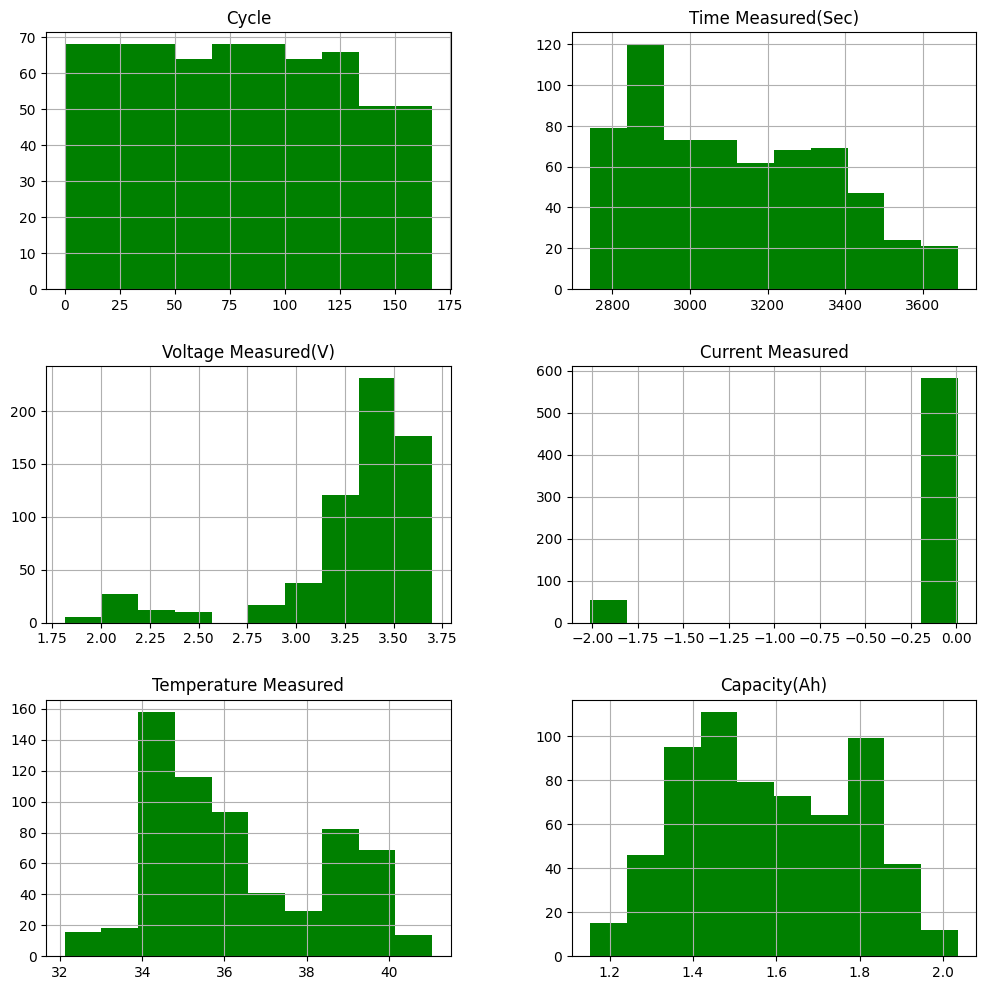

(445, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


d:\New folder\Volume D\Program Files\desktop\RUL-Estimation_of_Li-Ion_Batteries\pyenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

dataset = pd.read_csv('B0005.csv')
dataset = dataset.drop(labels=['SampleId'], axis=1)
print( 'Shape of DataFrame: {}'.format(dataset.shape))
print (dataset.loc[1])

data = dataset[~dataset.isin(['?'])]
data.loc[280:]

data = data.dropna(axis=0)
data.loc[280:]

print(data.shape)
print(data.dtypes)

data = data.apply(pd.to_numeric)
data.dtypes

data.hist(figsize = (12, 12), color="green")
plt.show()


X = np.array(data.iloc[:,0:5].values)
y = np.array(data.iloc[:,5].values)
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.3)

# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(7, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(3,kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['mean_absolute_error','accuracy'])
    return model

model = create_model()

model.save("alpha.h5")

In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('alpha.h5')

# Example custom data for a single prediction
custom_data = {
    "Cycle": [1],  
    "Time Measured(Sec)": [3672.344],  
    "Voltage Measured(V)": [2.351525512],  
    "Current Measured": [-2.010374856],  
    "Temperature Measured": [39.24620268]  
}

# Convert to DataFrame
custom_data_df = pd.DataFrame(custom_data)

# Normalize using the same mean and std from training
features = ["Cycle", "Time Measured(Sec)", "Voltage Measured(V)", "Current Measured", "Temperature Measured"]
X_custom = np.array(custom_data_df[features].values)
mean_custom = X_custom.mean(axis=0)
std_custom = X_custom.std(axis=0)
X_custom_normalized = (X_custom - mean_custom) / std_custom

# Make predictions
predictions = loaded_model.predict(X_custom_normalized)

# Print predictions
print("Predicted Capacity(Ah):", predictions[0][0])


1/1 [==============================] - 0s 64ms/step
Predicted Capacity(Ah): nan


C:\Users\H P\AppData\Local\Temp\ipykernel_26632\86279238.py:25: RuntimeWarning: invalid value encountered in divide
  X_custom_normalized = (X_custom - mean_custom) / std_custom


# 1st Trail

In [24]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('alpha.h5')

# Example custom data for a single prediction
custom_data = {
    "Cycle": [1],  
    "Time Measured(Sec)": [3672.344],  
    "Voltage Measured(V)": [2.351525512],  
    "Current Measured": [-2.010374856],  
    "Temperature Measured": [39.24620268]  
}

# Convert to DataFrame
custom_data_df = pd.DataFrame(custom_data)

# Normalize using the same mean and std from training
features = ["Cycle", "Time Measured(Sec)", "Voltage Measured(V)", "Current Measured", "Temperature Measured"]
X_custom = np.array(custom_data_df[features].values)
mean_custom = X_custom.mean(axis=0)
std_custom = X_custom.std(axis=0)

# Check for zero std to avoid division by zero
epsilon = 1e-8  # Small epsilon value
std_custom = np.where(std_custom == 0, epsilon, std_custom)

X_custom_normalized = (X_custom - mean_custom) / std_custom

# Make predictions
predictions = loaded_model.predict(X_custom_normalized)

# Print predictions
print("Predicted Capacity(Ah):", predictions[0][0])


1/1 [==============================] - 0s 190ms/step
Predicted Capacity(Ah): 0.5


# 2nd Trail

In [25]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('alpha.h5')

# Example custom data for a single prediction
custom_data = {
    "Cycle": [1],  
    "Time Measured(Sec)": [3672.344],  
    "Voltage Measured(V)": [2.351525512],  
    "Current Measured": [-2.010374856],  
    "Temperature Measured": [39.24620268]  
}

# Convert to DataFrame
custom_data_df = pd.DataFrame(custom_data)

# Normalize using the same mean and std from training
features = ["Cycle", "Time Measured(Sec)", "Voltage Measured(V)", "Current Measured", "Temperature Measured"]
X_custom = np.array(custom_data_df[features].values)
mean_custom = X_custom.mean(axis=0)
std_custom = X_custom.std(axis=0)

# Check for zero std to avoid division by zero
epsilon = 1e-8  # Small epsilon value
std_custom = np.where(std_custom == 0, epsilon, std_custom)

X_custom_normalized = (X_custom - mean_custom) / std_custom

# Make predictions
predictions = loaded_model.predict(X_custom_normalized)

# Print predictions
print("Predicted Capacity(Ah):", predictions[0][0])

1/1 [==============================] - 0s 61ms/step
Predicted Capacity(Ah): 0.5


# 3rd Trail

In [26]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('alpha.h5')

# Example custom data for a single prediction
custom_data = {
    "Cycle": [1],  
    "Time Measured(Sec)": [3672.344],  
    "Voltage Measured(V)": [2.351525512],  
    "Current Measured": [-2.010374856],  
    "Temperature Measured": [39.24620268]  
}

# Convert to DataFrame
custom_data_df = pd.DataFrame(custom_data)

# Normalize using the same mean and std from training
features = ["Cycle", "Time Measured(Sec)", "Voltage Measured(V)", "Current Measured", "Temperature Measured"]
X_custom = np.array(custom_data_df[features].values)
mean_custom = X_custom.mean(axis=0)
std_custom = X_custom.std(axis=0)

# Check for zero std to avoid division by zero
epsilon = 1e-8  # Small epsilon value
std_custom = np.where(std_custom == 0, epsilon, std_custom)

print("Mean Custom:", mean_custom)
print("Std Custom:", std_custom)

X_custom_normalized = (X_custom - mean_custom) / std_custom

# Print normalized data for inspection
print("Custom Data Normalized:")
print(X_custom_normalized)

# Make predictions
predictions = loaded_model.predict(X_custom_normalized)

# Print predictions
print("Predicted Capacity(Ah):", predictions[0][0])


Mean Custom: [ 1.00000000e+00  3.67234400e+03  2.35152551e+00 -2.01037486e+00
  3.92462027e+01]
Std Custom: [1.e-08 1.e-08 1.e-08 1.e-08 1.e-08]
Custom Data Normalized:
[[0. 0. 0. 0. 0.]]


1/1 [==============================] - 0s 75ms/step
Predicted Capacity(Ah): 0.5
